# AP156 Week 6 (19 Sep 18)

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Chain vibrations. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 101-106). New York: Springer (Original work published 1996).

In [6]:
import numpy as np
import matplotlib.pyplot as mp
import numpy.random as rd
from turtle import *

%matplotlib inline
mp.rc("text", usetex=True)
rd.seed(314159)

\begin{equation}
    M_i = rM_f
\end{equation}
\begin{equation}
    L_i = 3L_f
\end{equation}
\begin{equation}
    D = \lim_{L \rightarrow \infty} \frac{\log M}{\log L}
\end{equation}
\begin{equation}
    N(\epsilon) \propto \epsilon^{-D}
\end{equation}
\begin{equation}
    D = -\lim_{\epsilon \rightarrow 0} \frac{\log N(\epsilon)}{\log \epsilon}
\end{equation}
\begin{equation}
    L = \epsilon N(\epsilon)
\end{equation}


If we cut in half an edge of the triangle of length $L$, its mass is obviously reduced by a factor of 3. After $t$ steps, we have

\begin{equation}
    M_t = 3^{-t}M
\end{equation}
\begin{equation}
    L_t = 2^{-t}L
\end{equation}

This leads to

\begin{equation}
    D = \lim_{t \rightarrow \infty} \frac{\ln M_t}{\ln L_t} = \lim_{t \rightarrow \infty} \frac{(-t)\ln 3 + \ln M}{(-t)\ln 2 + \ln L} = \frac{\ln 3}{\ln 2}
\end{equation}


In [15]:
print("Fractal dimension (Sierpinski gasket) = %.2f"%(np.log(3)/np.log(2)))

Fractal dimension (Sierpinski gasket) = 1.58


In [7]:
iters = 10000
p = [ [0,0], [1,0], [0.5,1] ]
q = []
q.append([rd.random(), rd.random()])

In [8]:
for i in range(1,iters):
    j = rd.randint(3)
    q.append([ 1/2*(q[i-1][0] + p[j][0]), 1/2*(q[i-1][1] + p[j][1]) ])

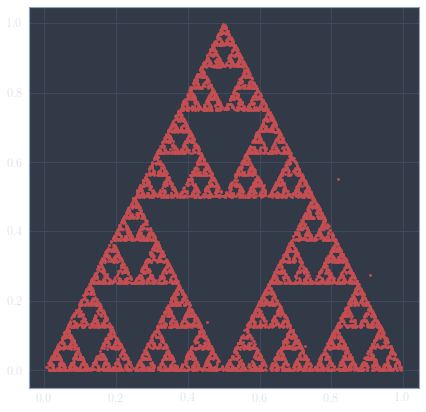

In [9]:
mp.figure(figsize=(7,7))

for i in range(len(q)):
    mp.plot(q[i][0],q[i][1], "r.")

mp.show()

In [2]:
def draw_triangle(vertices,color,my_turtle):
    my_turtle.fillcolor(color)
    my_turtle.up()
    my_turtle.goto(vertices[0][0],vertices[0][1])
    my_turtle.down()
    my_turtle.begin_fill()
    my_turtle.goto(vertices[1][0],vertices[1][1])
    my_turtle.goto(vertices[2][0],vertices[2][1])
    my_turtle.goto(vertices[0][0],vertices[0][1])
    my_turtle.end_fill()
    
def midpoint(point1, point2):
    return [1/2*(point1[0] + point2[0]), 1/2*(point1[1] + point2[1])]
    

def draw_fractal(vertices,level,my_turtle):
    colors = [(255,255,255),(0,0,0),(255,255,255),(0,0,0),(255,255,255),(0,0,0),(255,255,255),(0,0,0)]
    draw_triangle(vertices,colors[level],my_turtle)
    
    if level > 0:
        draw_fractal([vertices[0],
                      midpoint(vertices[0], vertices[1]),
                      midpoint(vertices[0], vertices[2])],
                      level - 1, my_turtle)
        draw_fractal([vertices[1],
                      midpoint(vertices[0], vertices[1]),
                      midpoint(vertices[1], vertices[2])],
                      level - 1, my_turtle)
        draw_fractal([vertices[2],
                      midpoint(vertices[2], vertices[1]),
                      midpoint(vertices[0], vertices[2])],
                      level - 1, my_turtle)

my_turtle = Turtle()
my_turtle.shape("classic")
screen = Screen()
screen.colormode(255)
vertices = [[-200, -100], [0, 200], [200, -100]]
level = 4
draw_fractal(vertices, level, my_turtle)
screen.exitonclick()

In [6]:
def snowflake(lengthSide, levels):
    if levels == 0:
        forward(lengthSide)
        return
    lengthSide /= 3.0
    snowflake(lengthSide, levels-1)
    left(60)
    snowflake(lengthSide, levels-1)
    right(120)
    snowflake(lengthSide, levels-1)
    left(60)
    snowflake(lengthSide, levels-1)
    
def full_snowflake(lengthside, levels):
    for i in range(3):
        snowflake(lengthside, levels)
        right(120)
if __name__ == "__main__":
    speed(0)
    length = 300.0
    penup()
    backward(length/2.0)
    pendown()
    full_snowflake(length, 4)
    mainloop()

In [16]:
print("Fractal dimension (Koch snowflake) = %.2f"%(np.log(4)/np.log(3)))

Fractal dimension (Koch snowflake) = 1.26
